In [15]:

import hashlib

from collections import Counter

class misra_gries:
    def __init__(self,k):
        self.count1 = Counter()
        self.k = k   

    def insert(self,value,count):
        for _ in range(count):
            #if space is empty then add it or increment if it already exists
            if value in self.count1 or len(self.count1)<self.k:
                self.count1[value] +=1
            else:
                #Remove one if you don't have one value
                for k1 in list(self.count1.keys()):
                    self.count1[k1]-=1
                    if(self.count1[k1]==0):
                        del self.count1[k1]

    def give_counts(self):
        return self.count1


class calculate_absolute:
    def __init__(self):
        self.count1 = Counter()
    
    def insert(self,value,count):
        self.count1[value]+=count

    def give_counts(self):
        return self.count1

class CountMinSketch:
  # it takes input and initiates the sketch
    def __init__(self, size_of_hashtables, number_of_hashtables):

        self.size_of_hashtables = size_of_hashtables
        self.number_of_hashtables = number_of_hashtables
        self.number_of_elements_added= 0
        self.hash_tables = []
        for _ in range(number_of_hashtables):
            table = [0 for _ in range(size_of_hashtables)]
            self.hash_tables.append(table)

    def _hash(self, x):
        # k-wise hash generation
        md5 = hashlib.md5(bytes(str(hash(x)),'utf-8'))
        for i in range(self.number_of_hashtables):
            md5.update(bytes(str(i),'utf-8'))
            yield int(md5.hexdigest(), 16) % self.size_of_hashtables
    
    def add(self, x, count):
        # function for adding a certain element
        self.number_of_elements_added+= count
        for table, i in zip(self.hash_tables, self._hash(x)):
            table[i] += count

    def get_count(self, x):
        #function for getting counts 
        return min(table[i] for table, i in zip(self.hash_tables, self._hash(x)))


    def __len__(self):
        # function for calculating number of elements from 
        return self.number_of_elements_added




class CountSketch:
  # it takes input and initiates the sketch
    def __init__(self, size_of_hashtables, number_of_hashtables):

        self.size_of_hashtables = size_of_hashtables
        self.number_of_hashtables = number_of_hashtables
        self.number_of_elements_added= 0
        self.hash_tables = []
        for _ in range(number_of_hashtables):
            table = [0 for _ in range(size_of_hashtables)]
            self.hash_tables.append(table)

    def _hash(self, x):
        # k-wise hash generation
        md5 = hashlib.md5(bytes(str(hash(x)),'utf-8'))
        for i in range(self.number_of_hashtables):
            md5.update(bytes(str(i),'utf-8'))
            yield int(md5.hexdigest(), 16) % self.size_of_hashtables

    def g(self,i):
        # getting the g for the each object
        if(i%2)==0:
            return -1
        else:
            return 1
    
    def add(self, x, count):
        # function for adding a certain element
        self.number_of_elements_added+= count
        for table, i in zip(self.hash_tables, self._hash(x)):
            table[i] += count*self.g(i)

    def get_count(self, x):
        #function for getting counts 
        return sum(table[i] for table, i in zip(self.hash_tables, self._hash(x)))/self.number_of_hashtables


    def __len__(self):
        # function for calculating number of elements from 
        return self.number_of_elements_added

w =5
karr = [100,200,500,1000,2000]
val = 100
file = open("matlab/train.data","r")
array_of_values = [i.strip() for i in file.readlines()]

absolute_counting = calculate_absolute()
for ab in array_of_values:
    a,b,c = ab.split()
    a = int(a)
    b = int(b)
    c = int(c)
    absolute_counting.insert(b,c)

arr_sorted = absolute_counting.count1.most_common(1000)

import random

a1 = set([])
while len(a1)!=100:
    a1.add(random.randint(0,1000))

a1 = list(a1)
a2 = list(range(len(a1)))

for i in range(len(a1)):
    a2[i] = list(arr_sorted)[a1[i]][1]
    a1[i] = list(arr_sorted)[a1[i]][0]

def averaged_error(actual_values,predicted_vales):
    assert(len(actual_values)==len(predicted_vales))
    value =0
    for i in range(len(actual_values)):
        value += abs(actual_values[i]-predicted_vales[i])/actual_values[i]
    return value/100

error_for_misra_gries =[]
error_for_count_sketch =[]
error_for_countmin_sketch =[]


for val in karr:
    misra_gries_counting = misra_gries(val*w)
    for ab in array_of_values:
        a,b,c = ab.split()
        a = int(a)
        b = int(b)
        c = int(c)
        misra_gries_counting.insert(b,c)
    top_count_for_misra_gries = []    
    for p in a1:
        top_count_for_misra_gries.append(misra_gries_counting.count1[p])

    avgerr = averaged_error(a2,top_count_for_misra_gries)
    error_for_misra_gries.append(avgerr)



    CountMinSketch_counting = CountMinSketch(val,w)
    for ab in array_of_values:
        a,b,c = ab.split()
        a = int(a)
        b = int(b)
        c = int(c)
        CountMinSketch_counting.add(b,c)
    top_count_for_Countmin_sketch = []
    for p in a1:
        top_count_for_Countmin_sketch.append(CountMinSketch_counting.get_count(p))
    avgerr = averaged_error(a2,top_count_for_Countmin_sketch)
    error_for_countmin_sketch.append(avgerr)



    CountSketch_counting = CountSketch(val,w)
    for ab in array_of_values:
        a,b,c = ab.split()
        a = int(a)
        b = int(b)
        c = int(c)
        CountSketch_counting.add(b,c)

    top_count_for_Count_sketch = []
    for p in a1:
        top_count_for_Count_sketch.append(CountSketch_counting.get_count(p))
    avgerr = averaged_error(a2,top_count_for_Count_sketch)
    error_for_count_sketch.append(avgerr)







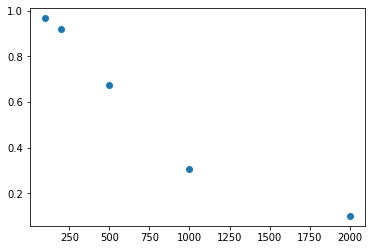

In [16]:
import matplotlib.pyplot as plt

plt.scatter(karr,error_for_misra_gries)

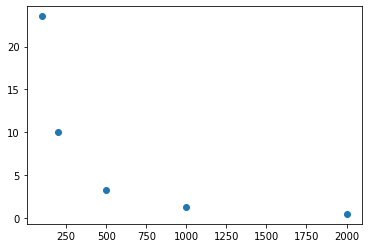

In [17]:
plt.scatter(karr,error_for_countmin_sketch)

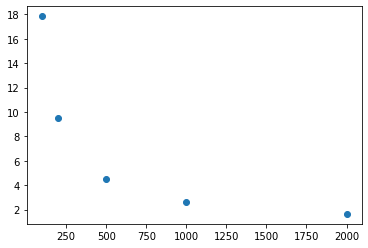

In [18]:
plt.scatter(karr,error_for_count_sketch)

In [19]:
# here the w = 2000 is giving the very accurate resultso we would need atleas 2000 for getting a result with less than 1% error
# In case of misra gries even the 500 works abd it gives the error of less than 1%